**Insights:** Considering the previous clustering visualizations, these bar charts make sense. Both visualizations indicate a strong similarity and partitioning of data. However, the distributions are slightly distinguished, especially for Agglomerative Clustering

**Conclusions:** Each clustering method partitions the data uniquely as expected. The distributions of K-Means and Spectral Clustering are more similar than Agglomerative, but all methods are applicable to the dataset

In [57]:
create_banner("8. Cluster Evaluation", bg_color=subheader_color)

## *This section used Silhouette Scores to assess the peformances of each of the three available clustering methods*

K-Means Silhouette Score: 0.3920
Agglomerative Silhouette Score: 0.3453
Spectral Silhouette Score: 0.3569


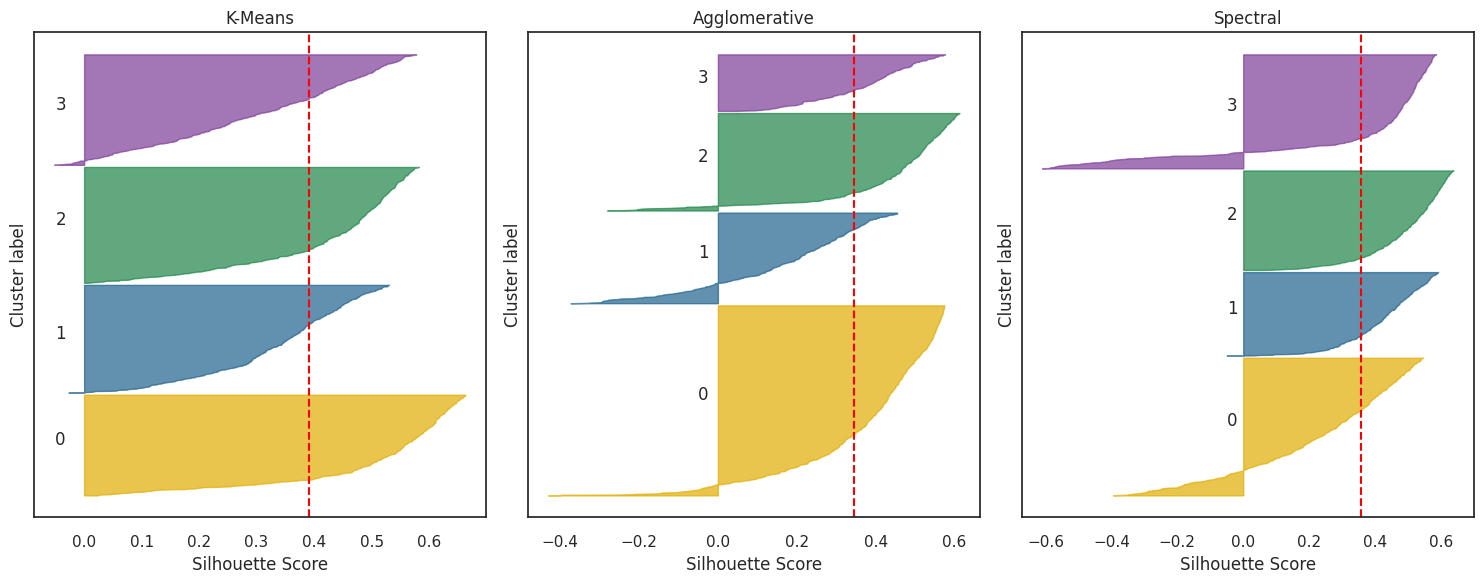

In [58]:
# Function to plot silhouette visualization as a subplot
def plot_silhouette(X, cluster_labels, method_name, ax):
    n_clusters = len(np.unique(cluster_labels))
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = pal[i % len(pal)]
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7
        )

        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f"{method_name}")
    ax.set_xlabel("Silhouette Score")
    ax.set_ylabel("Cluster label")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])


# Show a table of the performances of all clustering methods for Silhouette Score
def visualize_score_table():

    method_names = list(clustering_methods.keys())
    rounded_scores = [round(score, 3) for score in silhouette_scores]  # Round to 3 decimals only

    # Transform into a DataFrame of Pandas library
    silhouette_table = pd.DataFrame({
        "Clustering Method": method_names,
        "Silhouette Score": rounded_scores
    })

    # Plotting the table
    fig, ax = plt.subplots(figsize=(8, 6))  # Adjust size as needed
    ax.axis('off')  # Turn off the axes

    # Create the final table
    table = ax.table(cellText=silhouette_table.values,
                     colLabels=silhouette_table.columns,
                     cellLoc='center',
                     loc='center',
                     colColours=["#B22222", "#1E90FF"])


    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.auto_set_column_width([0, 1])  # Auto adjust column widths

    plt.title("Clustering Methods' Silhouette Scores", fontsize=14, weight='bold')
    plt.show()



# For each cluster, perform Silhouette Score analysis and plot the results
fig, axs = plt.subplots(1, len(clustering_methods), figsize=(15, 6), sharey=True)
silhouette_scores = []

for idx, (method_name, model) in enumerate(clustering_methods.items()):
    if method_name == "Spectral":
        cluster_labels = model.fit_predict(PCA_ds.iloc[:, :NUM_PCA_COMPONENTS])  # Spectral requires 3D-compatible data
    else:
        cluster_labels = model.fit_predict(PCA_ds.iloc[:, :NUM_PCA_COMPONENTS])

    silhouette_avg = silhouette_score(PCA_ds.iloc[:, :NUM_PCA_COMPONENTS], cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"{method_name} Silhouette Score: {silhouette_avg:.4f}")

    plot_silhouette(PCA_ds.iloc[:, :NUM_PCA_COMPONENTS], cluster_labels, method_name, axs[idx])

plt.tight_layout()
plt.show()

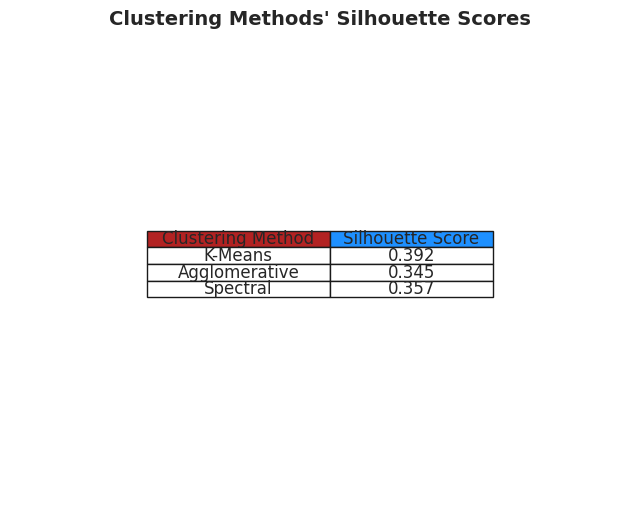

In [59]:
visualize_score_table()

**Insights:**
* The Silhouette Score for Agglomerative Clustering is slightly worse than the two other methods. By only observing their average scores and discrepancy in partitioning of data for the clusters, this can be identified
* K-Means and the Spectral approach of Hierarchical Clustering appears to be more suitable choices, given the context of this project with respect to the selected dataset. Besides their appropriate partitioning, as derived not only from the table above but from the two previous ones, their silhouette scores are also more consistent

**Conclusions:** As the previous bar charts indicate, Agglomerative Clustering appears to have a more skewed division of the clusters, resulting in a lower SIlhouette score. Nevertheless, all methods yield satisfying results, considering the range of evaluation is [-1, 1]. This entails that, in percentage, K-Means, Spectral and Agglomerative equates to 69.4%, 68.45% and 67.4% respectively

In [60]:
create_banner(f"9. Further Cluster Analysis of Selected Method: '{get_selected_clustering_method()}'", bg_color=subheader_color)

## *This section contains more visualizations of the relationships, using the selected method of the developer's choice. This selection is made at the top of this notebook, in **1.1 Developer's Configurations**.*

In [61]:
##  SELECTION OF CLUSTERING METHOD FOR FURTHER ANALYSIS  ##

if "KMeans" in selected_clustering_method:
  data["Clusters"] = yhat_kmeans
elif "Spectral" in selected_clustering_method:
  data["Clusters"] = yhat_spectral
else:
  data["Clusters"] = yhat_AC

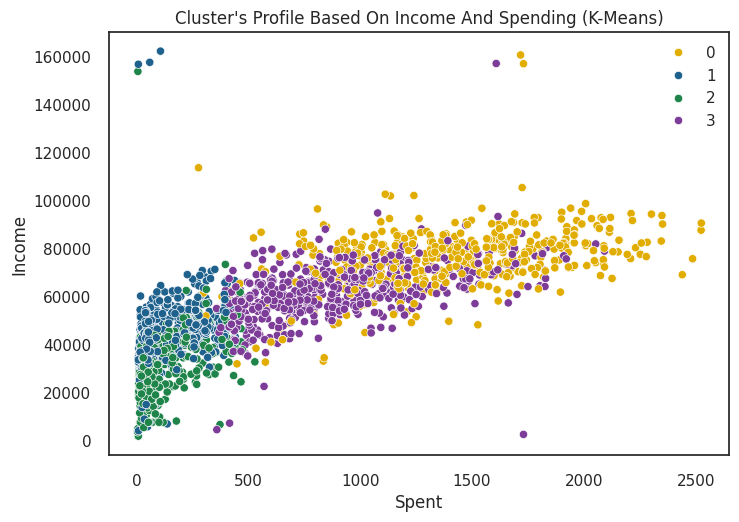

In [62]:
##  Income and Spendings partitioned into the formed clusters  ##

pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette=pal)
pl.set_title(f"Cluster's Profile Based On Income And Spending ({get_selected_clustering_method()})")
plt.legend()
plt.show()

**Insights:**
* Cluster 0: High income & High spending
* Cluster 1: Low income & Low spending
* Cluster 2: High income & Average spending
* Cluster 3: Low income & Low spending

**Conclusions:** The chart demonstrates a strong distinction of tendencies for the clusters, where the colored data points are grouped accordingly. Using the visualization above, we can conclude that income levels are clearly a prominent factor that contribute to each of the segments. First of all, before diving into the behavioral implications of each cluster, it’s important to recognize the overall pattern that applies to the broader population. It appears that, in general, as the income increases, the spending also increases. However, the higher the income, the less the spending tends to increase. This results in an exponential curve, where a steep upward curve is characterized for Cluster 1 and Cluster 3, the ones with the least income. The rise of the curve becomes less sharp for Cluster 2, and finally, a plateau is reached for Cluster 0, the most affluent group

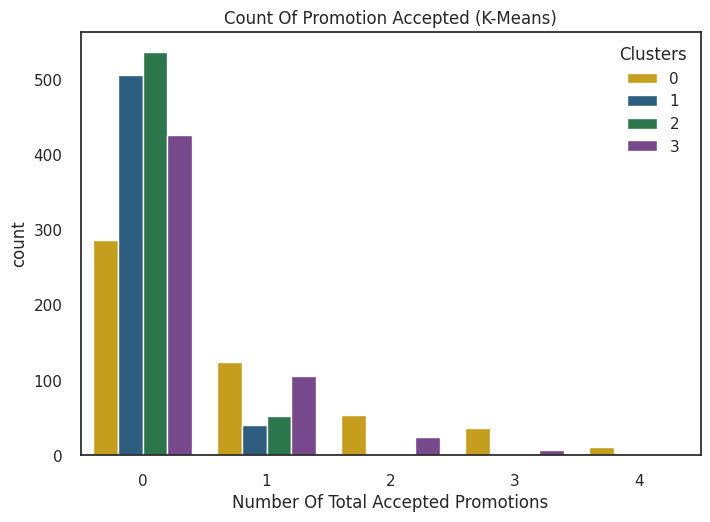

In [63]:
# Plotting count of total campaign accepted - Creating a feature to get a sum of accepted promotions
plt.figure()
pl = sns.countplot(x=data["Total Promo"],hue=data["Clusters"], palette= pal)
pl.set_title(f"Count Of Promotion Accepted ({get_selected_clustering_method()})")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

**Insights:**
* Cluster 0, the yellow, has the highest income as indicated by the last chart. In this bar chart, it appears that individuals in this cluster accepts more promotions as well
* Cluster 1 and 3, which the previous chart established as individuals with lower incomes, only receive 0 or 1 promotions. This is reasonable since there's a correlation between income and the number of consumption-promotions
* Cluster 2, previously established as high income with average spending, also has a greater number of accepted promotions

**Conclusions:** This bar chart builds on the insights from the previous chart, which highlighted income and spending patterns, by emphasizing that income is closely linked to the number of promotions received and accepted throughout a career. This conclusion is supported by the strong alignment observed in each cluster between levels of income and the number of promotions, illustrating a clear pairwise relationship and direct correlation

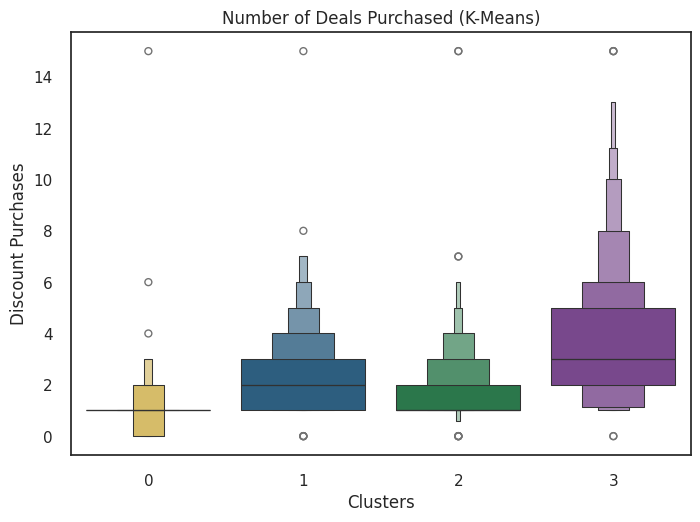

In [64]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=data["Discount Purchases"],x=data["Clusters"], palette= pal)
pl.set_title(f"Number of Deals Purchased ({get_selected_clustering_method()})")
plt.show()

**Background Information:** The attribute representing the number of deals purchased may be confusing to grasp in the context of the defined business objective. In essence, these deals are derived from the specific retail grocery store to which the dataset pertains. These deals are specifically focused on family-related matters, designed for kids, teenagers, and young adults. Therefore, the target audience is the newest generation, making parents the primary marketing focus. By extension, insights into the connection between parental status, marital status, and personality traits can be observed, highlighting their relevance to the defined business objective

**Insights:**
* It turns out that, despite the high spending of Cluster 0, it isn't into product deals offered by the store
* Cluster 2, with the second highest income, invest the most financial resources on discount deals

**Conclusions:** Cluster 1, Cluster 2 and Cluster 3 find the product offers more appealing. Although Cluster 2 spends most on deals by far, it’s important to look at the chart through the lens of disposable income. As established in a previous chart, income and spendings are highly correlated, and Cluster 2 has a significantly higher income than its two adjacent clusters. As a result, assuming these three clusters have equal interest levels in purchasing deals, Cluster 2 will naturally invest more financial resources. For that reason, the visualization cannot be purely interpreted by what it shows. By accounting for correlations that previous charts suggest, the plot reveals an interesting pattern. Considering that these deals are targeted toward families, we can conclude that Cluster 0 has no interest in becoming parents. At first glance, Cluster 2 seems to show the greatest interest in having children. However, taking into account the low incomes of Cluster 1 and Cluster 3, combined with their significant financial investment in family-oriented discount deals, it suggests that these groups frequently become parents. Ultimately, Cluster 3 demonstrates a slightly stronger inclination toward starting a family, as it represents the lowest income group yet allocates a larger portion of its spending to these deals

In [65]:
def create_family_features_2(data):
    # Ensure "Marital Status" is treated as string and consistent
    data["Marital Status"] = data["Marital Status"].astype(str).str.strip()

    # Replace values with predefined mapping
    valid_replacements = {
        "Married": "Couple",
        "Together": "Couple",
        "Absurd": "Alone",
        "Widow": "Alone",
        "YOLO": "Alone",
        "Divorced": "Alone",
        "Single": "Alone"
    }
    data["Marital Status"] = data["Marital Status"].replace(valid_replacements)

    # Create a numeric version of "Marital Status"
    numeric_mapping = {"Alone": 0, "Couple": 1}
    data["Marital_Status_Numeric"] = data["Marital Status"].replace(numeric_mapping)

    # Ensure consistency in 'Living_With' values
    data["Living_With"] = data["Marital Status"]

    # Add numeric encoding for operations
    data["Living_With_Numeric"] = data["Living_With"].replace({"Alone": 1, "Couple": 2}).astype(int)

    # Create Family_Size and Is Parent
    data["Family_Size"] = data["Living_With_Numeric"] + data["Children"]
    data["Is Parent"] = np.where(data["Children"] > 0, 1, 0)

    return data

In [66]:
##  DEFINE FUNCTIONS FOR PLOTTING CLUSTERS  ##
#   - These three functions visualize cluster data involving two features (x, y), and are distinguished by their visual structuring


def cluster_by_features_single(x_column, y_column):
  g = sns.jointplot(x=data[x_column], y=data[y_column], hue=data["Clusters"], kind="kde", palette=pal)
  g.fig.set_size_inches(7, 7)
  g.fig.tight_layout()
  plt.show()


def cluster_by_features_subplots_n_prev(x_columns, y_column):
    n_plots = len(x_columns)
    fig, axes = plt.subplots(1, n_plots, figsize=(7 * n_plots, 6))  # Adjust the size based on the number of plots
    fig.tight_layout(pad=5.0)

    fig.suptitle(f"Feature Comparisons with '{y_column}' ({get_selected_clustering_method()})", fontsize=16, fontweight='bold')

    # If there's only one plot, axes won't be an array, so wrap it in a list
    if n_plots == 1:
        axes = [axes]

    for i, x_column in enumerate(x_columns):
        if y_column == "Clusters":
            sns.countplot(x=data[x_column], hue=data[y_column], ax=axes[i], palette=pal)
            axes[i].set_title(f"{x_column} Distribution by {y_column}")
        else:
            sns.kdeplot(
                x=data[x_column],
                y=data[y_column],
                hue=data["Clusters"],
                ax=axes[i],
                fill=True,
                palette=pal
            )
            axes[i].set_title(f"{x_column} vs {y_column}")

    plt.show()

In [67]:
##  DEFINE FUNCTIONS FOR PLOTTING CLUSTERS  ##
#   - These three functions visualize cluster data involving two features (x, y), and are distinguished by their visual structuring

def cluster_by_features_single(data, x_column, y_column, pal):
  g = sns.jointplot(x=data[x_column], y=data[y_column], hue=data["Clusters"], kind="kde", palette=pal)
  g.fig.set_size_inches(7, 7)
  g.fig.tight_layout()
  plt.show()


def cluster_by_features_subplots_grid(data, x_columns, y_column, pal, get_selected_clustering_method):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.tight_layout(pad=5.0)

    fig.suptitle(f"Feature Comparisons with '{y_column}' ({get_selected_clustering_method()})", fontsize=16, fontweight='bold')
    axes = axes.flatten()

    for i, x_column in enumerate(x_columns):
        if len(data[x_column].unique()) > 1 and len(data[y_column].unique()) > 1 : # Check that there is enough data for a kde plot
            g = sns.kdeplot(
                x=data[x_column],
                y=data[y_column],
                hue=data["Clusters"],
                ax=axes[i],
                fill=True,
                palette=pal
            )
            axes[i].set_title(f"{x_column} vs {y_column}")
        else:
            print(f"Skipping plot for {x_column} vs {y_column} due to insufficient unique values for KDE plot.")


    plt.show()

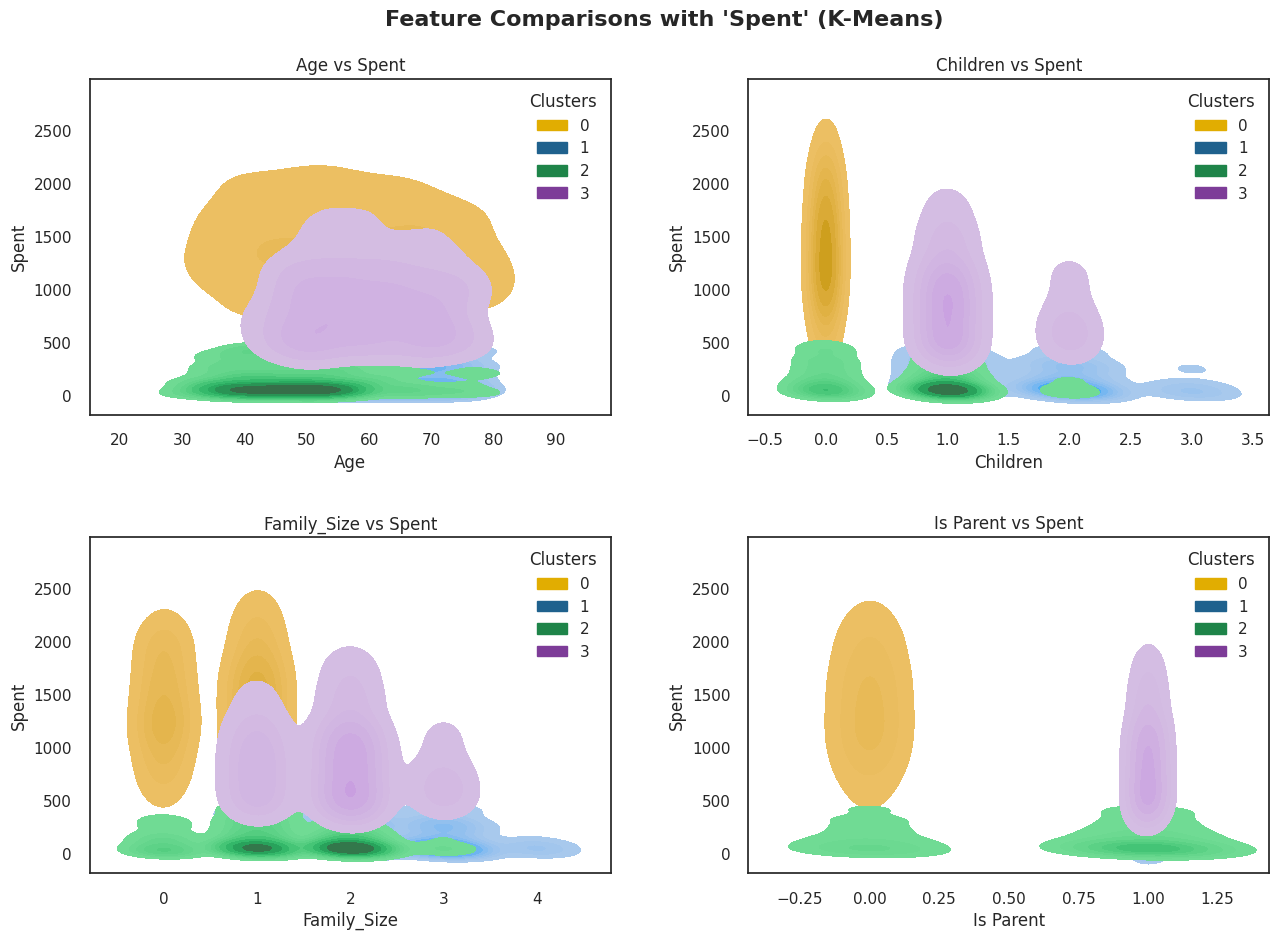

In [68]:
data = create_family_features_2(data)

x_columns = ["Age", "Children", "Family_Size", "Is Parent"]
cluster_by_features_subplots_grid(data, x_columns, "Spent", pal, get_selected_clustering_method)

**Note:** *It's worth noting that in the charts above where multiple smaller clusters are of one type is divided, it implies a discrepancy, or variance of value for that cluster. Thus, the plotted features are not directly key characheristics of the cluster. However, general trends between the different types can still be observed, implying that these divided clusters contribute or influence the overall distinguishing features of a cluster. For instance, in the chart *Family_Size vs Spent*, all cluster types are divided into smaller partitions, yet still are roughly located in the same regions of the chart. Consequently, this represents a cohesion that helps in understanding a cluster's overall qualities*

**Background Information:** In the sub-plot in the bottom right corner, *Is_Parent* represents a boolean, where 0 maps to *False* and 1 indicates *True*

**Insights:**

* **Age vs Spent:** For the two clusters with the highest incomes (Cluster 0 and 2), the peak years of spending lies between ages 40-50, and then it slowly reduces as the individuals get older. However, the spending is low throughout ages 25-80 for the two remaining clusters with lower income

* **Family_Size vs Spent & Children vs Spent:** Both diagrams indicate that Cluster 0, having the highest income, also preferably have smaller families but simultaneously spend more. Conversely, Cluster 1 and Cluster 3, with lower incomes, have more kids and larger families. Cluster 2 is in the middle of these two extremes

* **Is_Parent vs Spent:** Cluster 0 is not interested in becoming parents at all, whereas Cluster 2 and Cluster 3 are very interested in parental investment. Cluster 1 is divided on this issue, such that some become parents and others not

**Conclusions:**
* **Age vs Spent:** First of all, the chart with Age and Spent highlights a pattern for the two more economically affluent clusters (0 and 2), where the peak years of spending lie between ages 40-50. Thus, these individuals dedicate their young-adult-years (20-30) to building a career, and once they reach 40 and have accumulated wealth and safety, their expenditures on leisure tend to increase. However, this spending gradually decreases as their retirement years approach. Conversely, the other two clusters (1 and 3) that are operating with less disposable income, are consistently maintaining their low level of spending for all ages. This is a consequence of their low income level that holds them back from spending more money on leisure and luxuries for amusement and comfortability. Their strategy then translates into a balance between a few luxuries and keeping up with necessities such as housing and kids. In other words, their investment in luxuries is continuous but restricted to a low level

* **Family_Size vs Spent & Children vs Spent:** These two subplots primarily indicate that economic status doesn’t necessarily influence one’s choice of becoming a parent. In this way, the common stereotype where couples avoid having kids solely because of money issues is refuted. Thus, parental status has more to do with one’s personality and core values. Two contrasting extremes in this case would be:
  * *Prioritizing family to the point that personal freedom and flexibility is restrained*
  * *Neglecting family to gain more economic freedom and time on one’s own terms*

  In the visualization above, it appears that Cluster 0 has core values more concerned with personal freedom and flexibility, whereas Cluster 3 advocates for big families despite their suboptimal economic conditions. Cluster 1 and Cluster 2 are more in the middle of these two extremes. The first one switches between having children or remaining child-free, and if they decide to have kids, it only ranges between 1 and 2. The latter one is in a better economic situation and consistently chooses to have children, but not as many as Cluster 3, implying that they also value freedom and privacy like Cluster 0

* **Is_Parent vs Spent:** As highlighted in the previous boxplot chart, Cluster 0 avoids discount deals by virtue of their lack of interest in becoming parents. Cluster 1, which was the second most resistant to deals in the previous chart, is also the second most resistant to becoming a parent, where a clear division of opinions on parenting is illustrated. In this chart, Cluster 2 and Cluster 3 appears to have similar interests in becoming or being parents, where spendings is the only factor distinguishing them

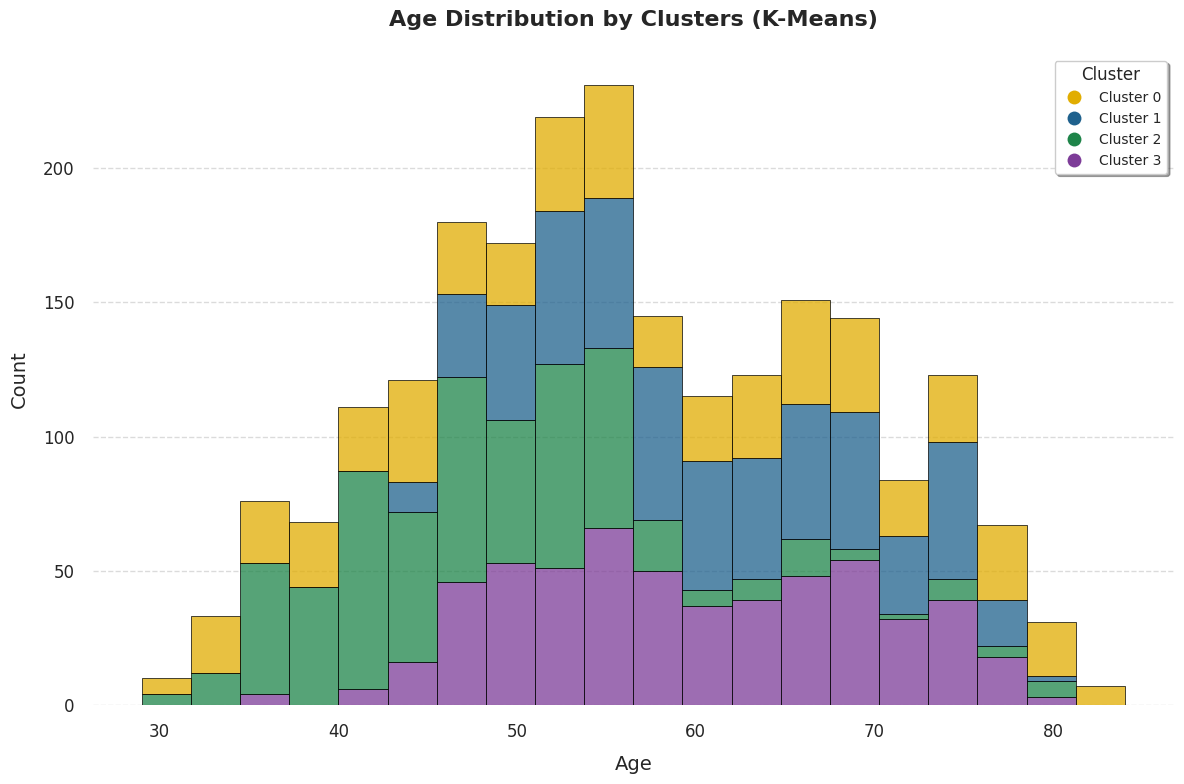

In [69]:
# Visualize each cluster's age distribution
def visualize_age_distribution_by_clusters():
    plt.figure(figsize=(12, 8))

    # Define the feature 'Age' as the value to use in the histogram
    sns.histplot(
        data=data,
        x="Age",
        hue="Clusters",
        multiple=distribution_multiple_bars_type,
        palette=pal,
        bins=20,
        kde=False,
        edgecolor=edge_color_analysis_charts,
        linewidth=0.5,
    )

    # Set the frontend displays of the labels of the chart
    plt.title(f"Age Distribution by Clusters ({get_selected_clustering_method()})", fontsize=16, fontweight="bold", pad=20)
    plt.xlabel("Age", fontsize=14, labelpad=10)
    plt.ylabel("Count", fontsize=14, labelpad=10)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    handles = [
        plt.Line2D([0], [0], marker="o", color="w", markerfacecolor=pal[i], markersize=10)
        for i in range(num_clusters)
    ]

    labels = [f"Cluster {i}" for i in range(num_clusters)]
    plt.legend(
        handles, labels,
        title="Cluster",
        title_fontsize=12,
        fontsize=10,
        loc="upper right",
        frameon=True,
        shadow=True,
    )

    plt.grid(axis="y", linestyle="--", alpha=0.7)
    sns.despine(left=True, bottom=True)
    plt.tight_layout()
    plt.show()

visualize_age_distribution_by_clusters()

**Insights:**
* Cluster 0: Uniform distribution across age 30-80
* Cluster 1: Primarily between 35-55
* Cluster 2: Concentrated on ages in the range of 50-75
* Cluster 3: Most are 50-80 years old

**Conclusions:** The age distributions for Cluster 0 and Cluster 1 are the closest to an even distribution, whereas Cluster 2 and Cluster 3 consist exclusively of older individuals. Referring to previous charts that suggest Cluster 2 and Cluster 3 are statistically the most likely to start a family and have children, they also appear to be the two clusters with the oldest age groups. This suggests that, in general, as people grow older, they tend to place greater value on family

In [70]:
# Returns a number formatted into 'thousands' suffix, using 'K'
def format_to_thousands(x, _):
    return f"{int(x // 1000)}K"

def cluster_swarmplot_with_areas_v4(data, x_columns, y_column, palette):

    area_colors = {0: "#FF5733", 1: "#2980B9"} # Map colors for background display of 'Alone' and 'Couple' of the 'Marital Status' feature

    n_plots = len(x_columns)
    fig, axes = plt.subplots(1, n_plots, figsize=(7 * n_plots, 12), sharey=True)


    fig.suptitle(f"Feature Comparisons with 'Marital Status' ({get_selected_clustering_method()})", fontsize=20, fontweight='bold', y=0.95)

    for i, x_column in enumerate(x_columns):
        ax = axes[i]

        for status, color in area_colors.items():
            ax.axhspan(status - 0.5, status + 0.5, color=color, alpha=0.5, zorder=0)

        # Create swarmplot
        sns.stripplot(
            data=data,
            x=x_column,
            y=y_column,
            hue="Clusters",
            palette=palette,
            dodge=True,
            jitter=True,
            size=8,
            alpha=0.7,
            ax=ax
        )

        ##  Map the frontend displays  ##
        ax.set_yticks([0, 1])
        ax.set_yticklabels(["Alone", "Couple"], fontsize=12)

        ax.grid(True, linestyle="--", alpha=0.5)
        ax.set_title(f"{x_column} vs Marital Status", fontsize=14, weight='bold')
        ax.set_xlabel(x_column, fontsize=12)
        ax.set_ylabel("Marital Status", fontsize=12)
        ax.xaxis.set_major_formatter(FuncFormatter(format_to_thousands))

    # Remove the cluster legends from individual plots
    for ax in axes:
        ax.legend_.remove()

    # Create central cluster legend and adjust its position
    cluster_handles, cluster_labels = ax.get_legend_handles_labels()
    cluster_legend = fig.legend(
        cluster_handles, cluster_labels,
        title="Clusters", loc="upper center", ncol=len(cluster_labels),
        fontsize=14, title_fontsize=16, frameon=True, bbox_to_anchor=(0.45, 0.90)
    )

    # Create area legend for "Alone" and "Couple" and position it next to the cluster legend
    area_legend_handles = [
        mpatches.Patch(color=color, label=label)
        for label, color in zip(["Alone Area", "Couple Area"], area_colors.values())
    ]
    area_legend = fig.legend(
        handles=area_legend_handles, loc="upper center", bbox_to_anchor=(0.65, 0.90),
        fontsize=12, title="Areas", title_fontsize=14, frameon=True
    )

    # Show plot
    plt.subplots_adjust(top=0.78, bottom=0.25)
    plt.show()

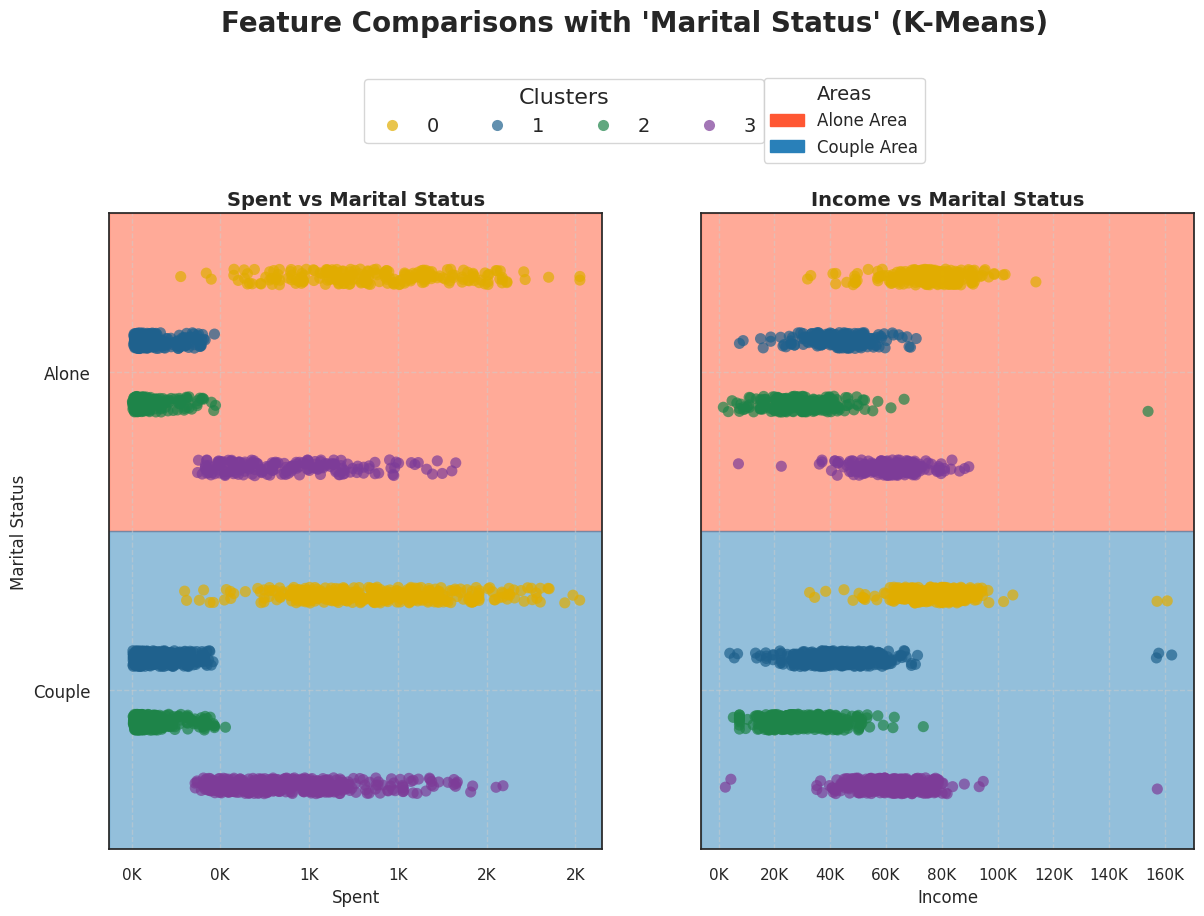

In [71]:
x_columns = ["Spent", "Income"]
cluster_swarmplot_with_areas_v4(data, x_columns, "Marital_Status_Numeric", pal)

**Insights:**

* **Spent vs Marital Status:** Although the spendings clearly differ for each cluster, an indifference to the marital status is conveyed

* **Income vs Marital Status:** Each data point is cohesively partitioned, such that almost no instances diverging from the main group exist

**Conclusions:** The spendings and incomes for each cluster is aligned with the findings of the previous charts. What makes this visualization unique is its grouping of Marital Status, where a data point either is classified as Alone or Couple. For the used dataset, it appears that one’s marital status doesn’t have a significant impact on the income and spendings. As such, we can conclude that strong personality traits of the partitioned clusters overrides the choice of marriage and the potential personal influences that come with it. This is an important finding, as this implies that the produced clusters represent major differences in personalities. In turn, we can make broader assumptions about the clusters’ personality traits, with respect to what the other visualizations indicate, while disregarding marital status from the equation:

* Cluster 2 and Cluster 3: As they are more likely to be parents and are older, their social media consumption, by extension, is more based on following their kids’ and grandkids’ daily lives

* Cluster 0: Avoids having kids and are more interested in productivity and business content on social media platforms

* Cluster 1: Some become parents and some don't. This group doesn’t focus that much on work and instead finds amusement in entertainment content

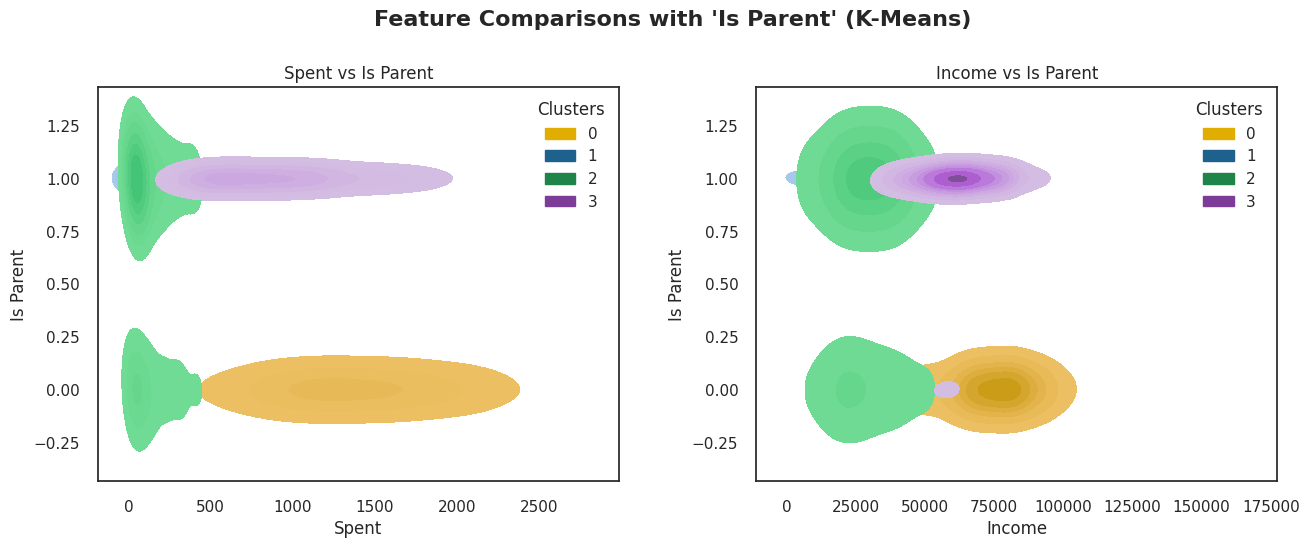

In [72]:
x_columns = ["Spent", "Income"]
cluster_by_features_subplots_n_prev(x_columns, "Is Parent")

**Insights:** Using the previous chart Spent vs Is_Parent as a reference for comparison, we can see a pattern between parental spendings and income. As clearly established by previous charts, Cluster 0 has the highest income. However, the interesting discovery is the incomes of the parents. All clusters, except Cluster 0, that are classified as parents generally experience an elevated income compared to their non-parental income. This is particularly true for Cluster 2  and Cluster 3, which previous charts identified as the most interested in parenting

**Conclusions:** As the right sub-plot shows, combined with correlations involving previous charts, there is a general trend between an individual’s income and perspective on the topic of parenting. The more invested in parenting a group of individuals is, the higher their income becomes relative to their particular personality traits that limits their work ethic and potential to make more money. For instance, Cluster 0 may have the highest income and have a strong aversion toward starting a family, but their inherent personality traits promote a work ethic that drives them to work harder and make more money. In contrary, Cluster 2 and Cluster 3 have personal preferences of investing time beyond work, which explains their low income relative to Cluster 0, as shown in the Spending vs Income chart at the beginning of the section “Further Cluster Analysis of the Baseline method K-Means”. However, in the chart above, it is evident that parents in Cluster 2 and Cluster 3, who predominantly choose to have children according to insights from previous charts, surpass their baseline income or lifestyle level upon being parents. Furthermore, Cluster 3, the group with the lowest income, now surpasses Cluster 1 and comes close to matching the affluence of Cluster 2. Similarly, parents in Cluster 2 nearly achieve the same income level as those in Cluster 0

In [73]:
create_banner("10. Conclusions", bg_color=subheader_color)

## Business Impact

The defined business objective, driven by the research question, was to develop clustering models that group the data and uncover insights from the resulting cluster structures. These insights are then analyzed and extended to broader contexts, such as spending patterns and personality traits, to reveal the unique characteristics of each segmented group. By leveraging this meaningful information, we can achieve actionable wisdom, using the segmentation to enable data-driven decision-making. A few key benefits include:
Targeting audiences more effectively based on marital status, parental status, age, income, and spending patterns
Designing more impactful and efficient marketing campaigns
Reducing wasted resources by avoiding outreach to audiences whose personalities don’t align with the intended message

Achieving these milestones require high-quality clusters that allow clear distinctions between segments, making it possible to identify meaningful patterns. To evaluate the quality of the clustering methods, the Silhouette Score metric from -1 to 1 was used. The results were as follows:
K-Means: 0.388 (69.4%)
Agglomerative Clustering: 0.348 (67.4%)
Spectral Clustering: 0.369 (68.45%)

Among these methods, K-Means, which served as the baseline, achieved the highest Silhouette Score of 0.388, equating to 69.4%. This indicates high-quality clusters with strong intra-cluster cohesion and low inter-cluster overlap. Agglomerative and Spectral Clustering also produced competitive results, with scores of 67.4% and 68.45%. It’s important to note that these percentages don’t represent accuracy, as they do in classification tasks. Instead, they serve as indicators of how well the clusters are separated, providing a measure of their reliability for generating insights. Rather than reflecting "right" or "wrong" outcomes, these scores assess the clarity and trustworthiness of the visualized clusters for informed decision-making.


### Business Conclusions

Now, once the clusters have been visualized and evaluated by their reliability, it’s time to make conclusions from the business and marketing perspective. The insights below represent the key findings which are valuable for stakeholders and managers to adjust or tailor marketing efforts.

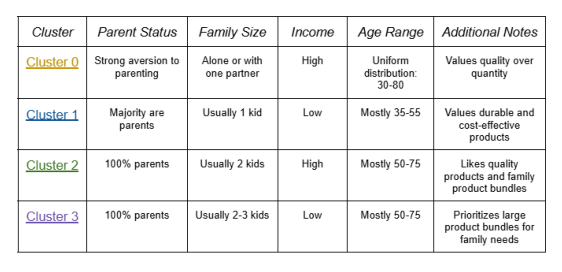

In [74]:
load_public_image("https://gitlab.com/jex-projects/mrjex/-/raw/main/projects/1.%20courses/year-3/1.%20Exchange%20Studies%20Venice/5.%20Data%20Science%20&%20Business%20Intelligence/project/readme-material/cluster-characteristics.PNG?ref_type=heads&inline=false")

#### Marketing of products
*The conclusions below are based on the insights of popularity of discount family deals, incomes, spendings, parental status and marital status*


* **High parental investment:** Marketing efforts for families is more favorable for Cluster 3, Cluster 1, Cluster 2, and since Cluster 2 has more disposable income, as a result of their higher education, they also tend to spend more money, making the return on investment in marketing campaign highest for targeting this cluster. However, since Cluster 3 has more kids, discount deals with more quantity of products targeting more persons or kids would entice Cluster 3, since their main goal is to take care of all their kids while keeping their economy in check


* **No parental investment:** In contrast, Cluster 0 that refrains from having kids is not ideal to target with these types of family-based discounts. Instead, they value quality over quantity, making premium deals a more suitable marketing appeal for them


* **Moderate parental investment:** Also, Cluster 1 that sometimes have kids and sometimes not, coupled with their low income, find slightly more value in family discount deals, but what appeals to this group is mainly the practicality of the products. Instead of judging brands by their premium status as Cluster 0, they primarily want the products they buy to work as intended for longer periods of time, saving them money